In [197]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

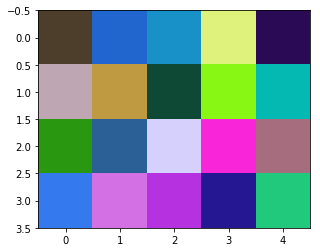

  0%|          | 0/20 [00:00<?, ?it/s]

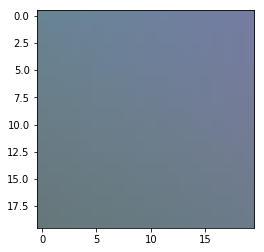

  5%|▌         | 1/20 [00:00<00:04,  4.69it/s]

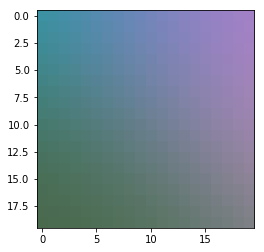

 10%|█         | 2/20 [00:00<00:03,  4.71it/s]

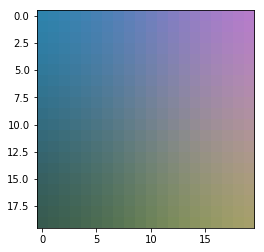

 15%|█▌        | 3/20 [00:00<00:03,  4.70it/s]

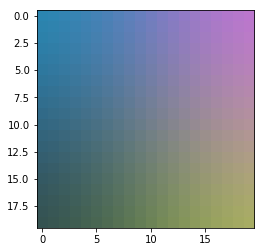

 20%|██        | 4/20 [00:00<00:03,  4.71it/s]

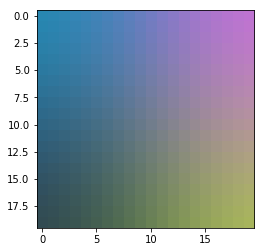

 25%|██▌       | 5/20 [00:01<00:03,  4.68it/s]

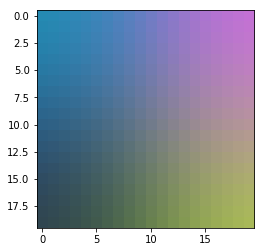

 30%|███       | 6/20 [00:01<00:03,  4.63it/s]

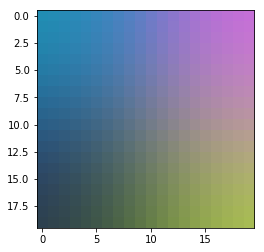

 35%|███▌      | 7/20 [00:01<00:02,  4.60it/s]

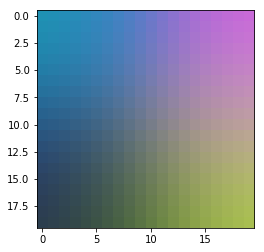

 40%|████      | 8/20 [00:01<00:02,  4.58it/s]

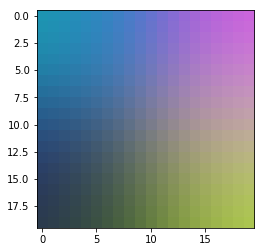

 45%|████▌     | 9/20 [00:01<00:02,  4.58it/s]

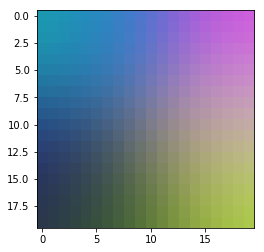

 50%|█████     | 10/20 [00:02<00:02,  4.56it/s]

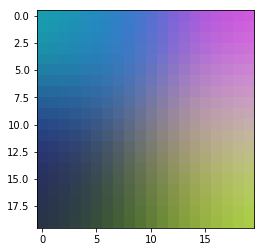

 55%|█████▌    | 11/20 [00:02<00:01,  4.54it/s]

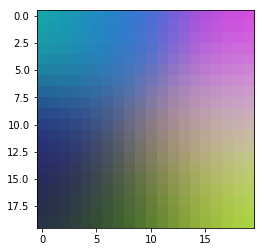

 60%|██████    | 12/20 [00:02<00:01,  4.51it/s]

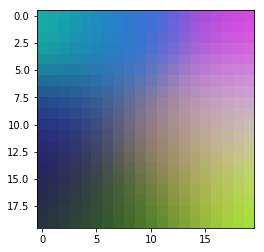

 65%|██████▌   | 13/20 [00:02<00:01,  4.51it/s]

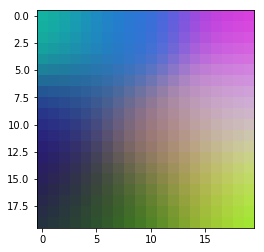

 70%|███████   | 14/20 [00:03<00:01,  4.56it/s]

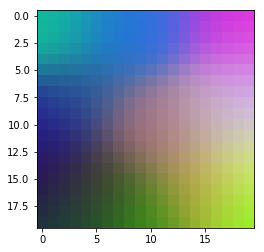

 75%|███████▌  | 15/20 [00:03<00:01,  4.60it/s]

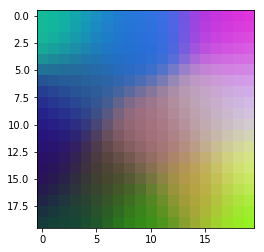

 80%|████████  | 16/20 [00:03<00:00,  4.63it/s]

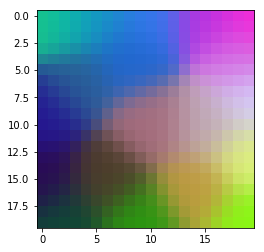

 85%|████████▌ | 17/20 [00:03<00:00,  4.64it/s]

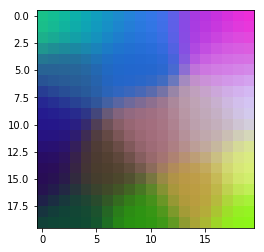

 90%|█████████ | 18/20 [00:03<00:00,  4.55it/s]

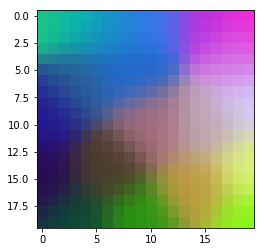

 95%|█████████▌| 19/20 [00:04<00:00,  4.48it/s]

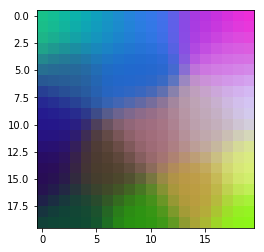

100%|██████████| 20/20 [00:04<00:00,  4.50it/s]


In [222]:
l = 20
K = l ** 2
N = 20
T = 20
τ = 20
# 観測データと参照ベクトル
x = np.random.randint(0, 255, (N, 3))
y = np.random.randint(0, 255, (l*l, 3))

plt.imshow(x.reshape(4,5,3))
plt.show()

# 勝者ノード 
BMU = np.zeros(N, dtype=np.int64)
# 学習量
R = np.zeros((N, K))

def h(z, ζ, σ):
    return np.exp(-0.5 / (σ**2) * np.linalg.norm(z - ζ)**2)

for t in tqdm(range(T)):
    # step 1
    for n in range(N):
        k = np.argmin(np.linalg.norm(y - x[n], axis=1) ** 2)
        BMU[n] = k
    
    # step 2
    for n in range(N):
        for k in range(K):
            ζ = np.array([BMU[n]%l, BMU[n]//l]) 
            z = np.array([k%l, k//l])
            σ = np.max((l/2 *(1 - t/τ), l/10))
            R[n, k] = h(z, ζ, σ)
    
    # step 3
    for k in range(K):
         y[k] = (R[:, k].reshape(-1,1)*x).sum(axis=0) / R[:, k].sum()

    plt.imshow(y.reshape(l,l,3))
    plt.show()